<a href="https://colab.research.google.com/github/yogi753/Air-Sense/blob/main/Prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('city_hour.csv')

# Check for missing values
print(data.isnull().sum())


City               0
Datetime           1
PM2.5         134436
PM10          287240
NO            108192
NO2           108360
NOx           119624
NH3           264151
CO             82859
SO2           119380
O3            120678
Benzene       147123
Toluene       204084
Xylene        439306
AQI           120235
AQI_Bucket    120235
dtype: int64


In [ ]:
# Impute missing values in the AQI column using the mean value
data['AQI'] = data['AQI'].fillna(data['AQI'].mean())
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10'] = data['PM10'].fillna(data['PM10'].mean())
data['NO'] = data['NO'].fillna(data['NO'].mean())
data['NO2'] = data['NO2'].fillna(data['NO2'].mean())
data['NOx'] = data['NOx'].fillna(data['NOx'].mean())
data['NH3'] = data['NH3'].fillna(data['NH3'].mean())
data['CO'] = data['CO'].fillna(data['CO'].mean())
data['SO2'] = data['SO2'].fillna(data['SO2'].mean())
data['O3'] = data['O3'].fillna(data['O3'].mean())
data['Benzene'] = data['Benzene'].fillna(data['Benzene'].mean())
data['Toluene'] = data['Toluene'].fillna(data['Toluene'].mean())
data['Xylene'] = data['Xylene'].fillna(data['Xylene'].mean())
# Check for missing values again
print(data.isnull().sum())

City               0
Datetime           1
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI                0
AQI_Bucket    120235
dtype: int64


**PROPHET Weekly Analysis**

<ipython-input-76-0d22d61d0780>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp055dkur8/vw4_wbgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp055dkur8/l8ov40pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61960', 'data', 'file=/tmp/tmp055dkur8/vw4_wbgx.json', 'init=/tmp/tmp055dkur8/l8ov40pp.json', 'output', 'file=/tmp/tmp055dkur8/pro

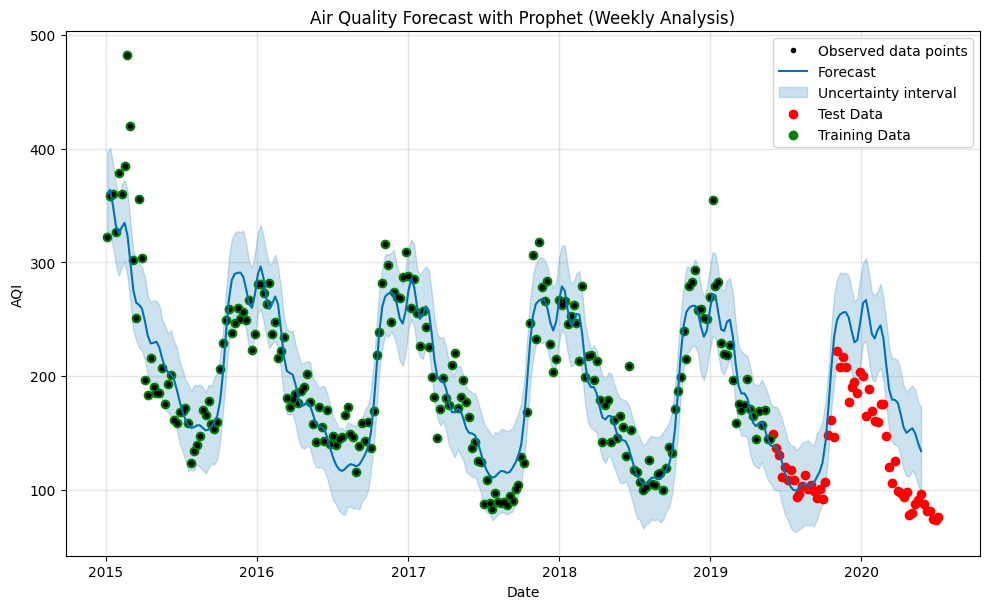

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (weekly)
week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()
week = week.reset_index()
week = week.rename(columns={'Datetime': 'ds', 'AQI': 'y'})

# Split the data into training and testing sets
train_size = int(0.8 * len(week))
train_week = week[:train_size]
test_week = week[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_week)

# Create a dataframe for future predictions (up to 2023)
future = model.make_future_dataframe(periods=52, freq='W')  # Forecast for 52 weeks (about one year)
forecast = model.predict(future)

# Plot the results including training and testing data
fig = model.plot(forecast)
plt.scatter(test_week['ds'], test_week['y'], color='red', label='Test Data')  # Plot the testing data points
plt.scatter(train_week['ds'], train_week['y'], color='green', label='Training Data')  # Plot the training data points
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Forecast with Prophet (Weekly Analysis)')
plt.legend()
plt.show()

# You can access the forecasted values using forecast['yhat']
weekly_forecast = forecast[['ds', 'yhat']].set_index('ds')


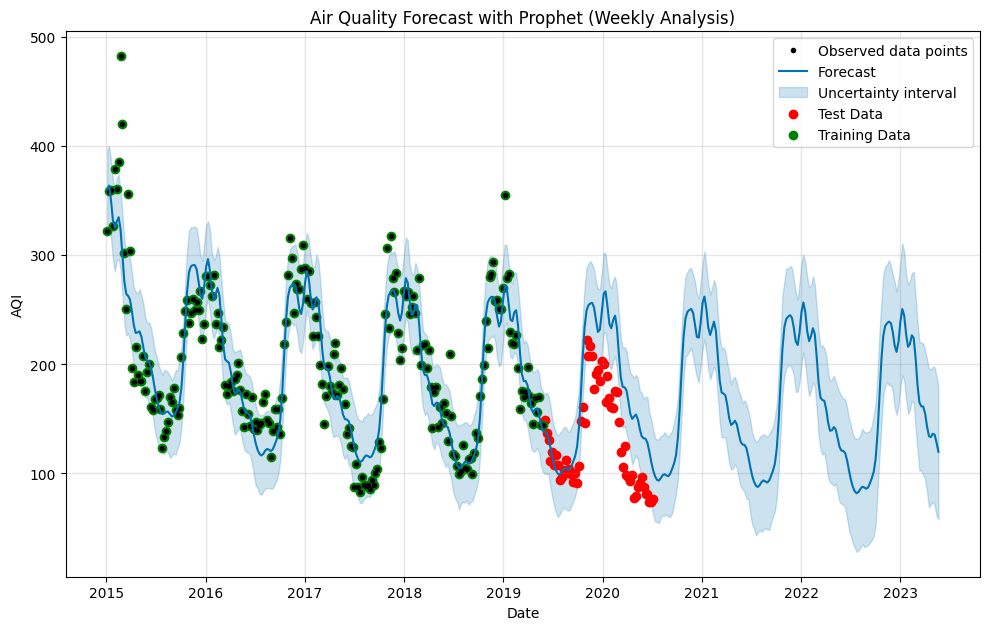

In [ ]:
# Create a dataframe for future predictions (up to 2023)
future = model.make_future_dataframe(periods=208, freq='W')  # Forecast for 156 weeks (about 3 years)
forecast = model.predict(future)

# Plot the results including training, testing, and future forecasting data
fig = model.plot(forecast, xlabel='', ylabel='AQI')  # Set xlabel to an empty string
plt.scatter(test_week['ds'], test_week['y'], color='red', label='Test Data', marker='o')  # Plot the testing data points
plt.scatter(train_week['ds'], train_week['y'], color='green', label='Training Data', marker='o')  # Plot the training data points
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Forecast with Prophet (Weekly Analysis)')
plt.legend()
plt.show()

# You can access the forecasted values using forecast['yhat']
weekly_forecast = forecast[['ds', 'yhat']].set_index('ds')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate the metrics using the test data and forecasted values
y_true = test_week['y'].values
y_pred = forecast[-len(test_week):]['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2%}')
print(f'R-squared: {r2:.2f}')


RMSE: 62.67
MSE: 3927.44
MAE: 51.11
MAPE: 43.24%
R-squared: -1.10


**PROPHET Monthly Analysis**

<ipython-input-14-89ec781e6a14>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp055dkur8/65js2ysk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp055dkur8/8m67u58i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78976', 'data', 'file=/tmp/tmp055dkur8/65js2ysk.json', 'init=/tmp/tmp055dkur8/8m67u58i.json', 'output', 'file=/tmp/tmp055dkur8/pr

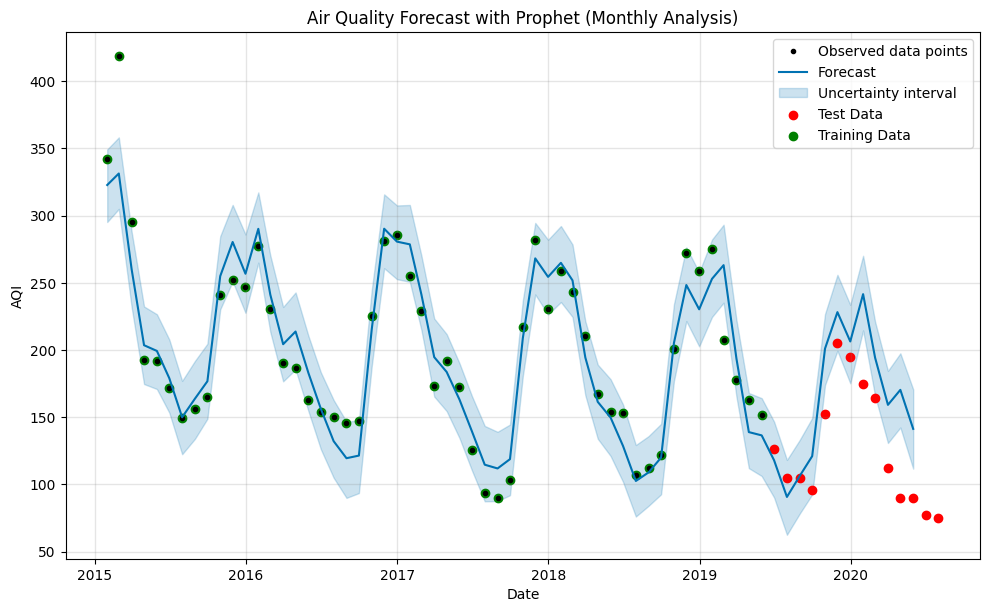

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (monthly)
month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()
month = month.reset_index()
month = month.rename(columns={'Datetime': 'ds', 'AQI': 'y'})

# Split the data into training and testing sets
train_size = int(0.8 * len(month))
train_month = month[:train_size]
test_month = month[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_month)

# Create a dataframe for future predictions (up to 2023)
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast for 12 months (about one year)
forecast = model.predict(future)

# Plot the results including training and testing data
fig = model.plot(forecast)
plt.scatter(test_month['ds'], test_month['y'], color='red', label='Test Data')  # Plot the testing data points
plt.scatter(train_month['ds'], train_month['y'], color='green', label='Training Data')  # Plot the training data points
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Forecast with Prophet (Monthly Analysis)')
plt.legend()
plt.show()

# You can access the forecasted values using forecast['yhat']
monthly_forecast = forecast[['ds', 'yhat']].set_index('ds')

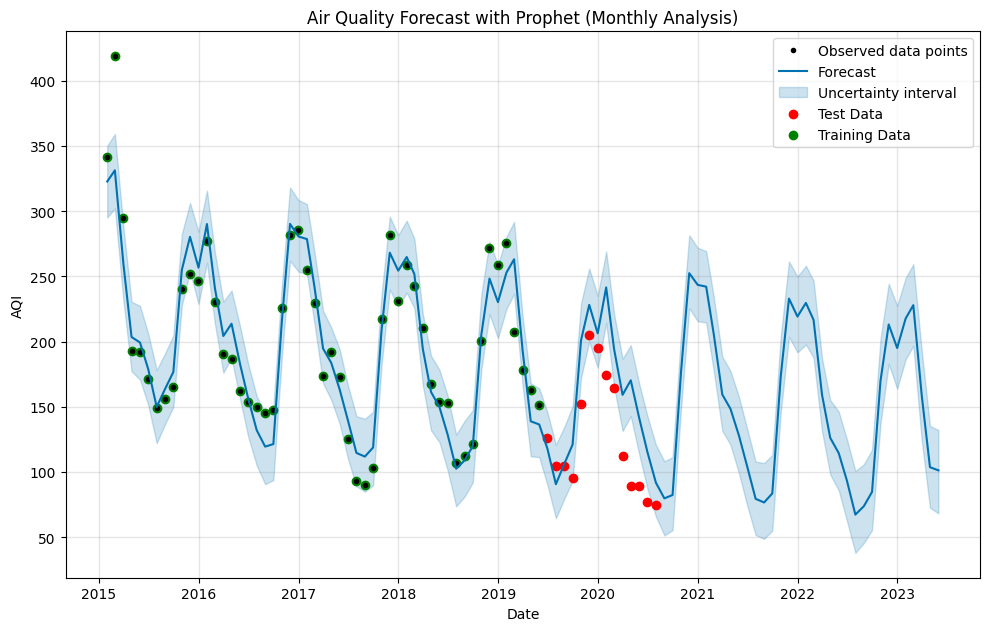

In [ ]:
# Create a dataframe for future predictions (up to 2023)
future = model.make_future_dataframe(periods=48, freq='M')  # Forecast for 36 months (3 years)
forecast = model.predict(future)

# Plot the results including training, testing, and future forecasting data
fig = model.plot(forecast, xlabel='', ylabel='AQI')  # Set xlabel to an empty string
plt.scatter(test_month['ds'], test_month['y'], color='red', label='Test Data', marker='o')  # Plot the testing data points
plt.scatter(train_month['ds'], train_month['y'], color='green', label='Training Data', marker='o')  # Plot the training data points
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Forecast with Prophet (Monthly Analysis)')
plt.legend()
plt.show()

# You can access the forecasted values using forecast['yhat']
monthly_forecast = forecast[['ds', 'yhat']].set_index('ds')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate the metrics using the test data and forecasted values for monthly analysis
y_true = test_month['y'].values
y_pred = forecast[-len(test_month):]['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2%}')
print(f'R-squared: {r2:.2f}')

RMSE: 66.15
MSE: 4375.97
MAE: 50.60
MAPE: 43.44%
R-squared: -1.43


**Comparative Analysis**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame from the regression metrics
metrics_df = pd.DataFrame({
    'Prophet Model': ['Month Wise','Week Wise'],
    'RMSE': ['66.15','62.67'],
    'MAE': ['50.60','51.11'],
    'MAPE':['43.44','43.24'],
    'MSE':['4375.97','3927.44'],
    'R-Square':['-1.43','-1.10']
})

# Set the index to the 'Metric' column
metrics_df = metrics_df.set_index('Prophet Model')
table_heading = "Performance Result :"

# Convert the DataFrame to a tabular format with borders
table = tabulate(metrics_df, headers='keys', tablefmt='pretty', numalign='center')

# Display the table
print(table_heading)
print(table)

Performance Result :
+---------------+-------+-------+-------+---------+----------+
| Prophet Model | RMSE  |  MAE  | MAPE  |   MSE   | R-Square |
+---------------+-------+-------+-------+---------+----------+
|  Month Wise   | 66.15 | 50.60 | 43.44 | 4375.97 |  -1.43   |
|   Week Wise   | 62.67 | 51.11 | 43.24 | 3927.44 |  -1.10   |
+---------------+-------+-------+-------+---------+----------+


In [ ]:
# Original R-squared values
r2_values = {
    'Prophet Month Wise': -1.43,
    'Prophet Week Wise': -1.10
}

# Convert to positive R-squared values
positive_r2_values = {model: abs(r2) for model, r2 in r2_values.items()}

# Print the converted values
for model, r2 in positive_r2_values.items():
    print(f"{model}: {r2}")

Prophet Month Wise: 1.43
Prophet Week Wise: 1.1


In [ ]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'Model_Name': ['Prophet Month Wise', 'Prophet week Wise'],
    'RMSE': ['66.15','62.67'],
    'MAE': ['50.60','51.11'],
    'MAPE':['43.44','43.24'],
    'MSE':['4375.97','3927.44'],
    'R-Square':['1.43','1.1']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define columns to divide by 100
columns_to_divide = ['RMSE', 'MAPE', 'MAE', 'MSE']

# Convert the specified columns to numeric (float) values
df[columns_to_divide] = df[columns_to_divide].astype(float)

# Divide all values (except R-squared values) by 100
df[columns_to_divide] = df[columns_to_divide] / 100

# Print the modified DataFrame
print(df)

           Model_Name    RMSE     MAE    MAPE      MSE R-Square
0  Prophet Month Wise  0.6615  0.5060  0.4344  43.7597     1.43
1   Prophet week Wise  0.6267  0.5111  0.4324  39.2744      1.1


In [ ]:
# Sample data (replace with your actual data)
data = {
    'Model_Name': ['Prophet Month Wise', 'Prophet week Wise'],
    'MSE': [43.7597, 39.2744]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Divide all values (except R-squared values) by 100
columns_to_divide = ['MSE']
df[columns_to_divide] = df[columns_to_divide] / 100

print(df)

           Model_Name       MSE
0  Prophet Month Wise  0.437597
1   Prophet week Wise  0.392744


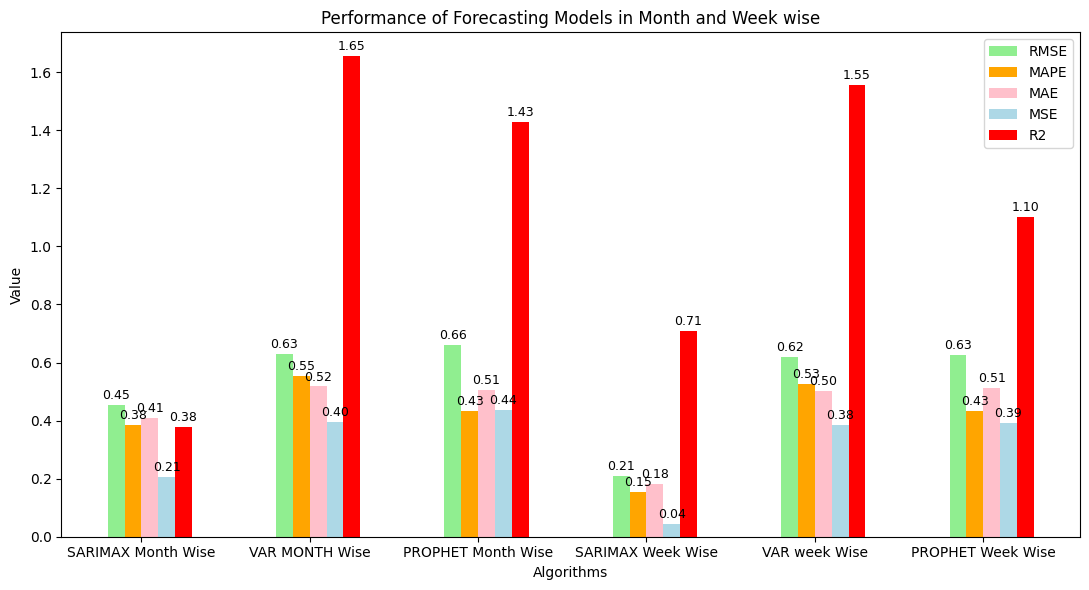

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "PROPHET Month Wise", "SARIMAX Week Wise", "VAR week Wise", "PROPHET Week Wise"]
rmse_values = [0.453071, 0.628621, 0.6615, 0.209143, 0.619369, 0.6267]
mape_values = [0.383661, 0.553240, 0.4344, 0.153223, 0.527686, 0.4324]
mae_values = [0.409460, 0.517567,  0.5060, 0.180633, 0.500986, 0.5111]
mse_values = [0.205273, 0.395164,  0.437597, 0.043741, 0.383618, 0.392744]
r2_values = [0.37889, 1.654453, 1.43, 0.70873, 1.554512, 1.1]

data = {
    'Model Names': model_names,
    'RMSE': rmse_values,
    'MAPE': mape_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
}

df = pd.DataFrame(data)

# Set the figure size and create a bar chart
plt.figure(figsize=(11, 6))

# Define the number of bars and their positions
num_bars = len(df)
bar_width = 0.10
index = np.arange(num_bars)

# Define colors for each metric
colors = {'RMSE': 'lightgreen', 'MAPE': 'orange', 'MAE': 'pink', 'MSE': 'lightblue','R2':'red',}

# Loop through each metric and plot it
for i, (metric, color) in enumerate(colors.items()):
    plt.bar(index + i * bar_width, df[metric], width=bar_width, label=metric, color=color)

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Value')
plt.title('Performance of Forecasting Models in Month and Week wise')
plt.xticks(index + bar_width * 1.5, df['Model Names'])
plt.legend(loc='best')

# Add data labels above each bar
for i, metric in enumerate(colors.keys()):
    for j, value in enumerate(df[metric]):
        plt.text(index[j] + i * bar_width, value + 0.01 , f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()